In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t

In [2]:
def t_score(sample_size, sample_mean,pop_mean,sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~**

**step-1:** 
Altarnative Hypothesis:  $H_1$: $\mu>4$
      
Null Hypothesis:         $H_0:$ $\mu\leq4$


**Step-2:**

collect a sample of size n=20 [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]


compute Sampling mean $\bar x$


$\bar x=$
4.25



**step3:**   Compute test statistics       $t= \frac{\bar x-\mu }{s/\sqrt{n}}$


**step4:** Decide $\alpha$

**step 5.1:** Right tailed T-test:                  reject $H_0$ if



**step 5.2:** Compute P-value




In [26]:
lst=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(lst)/len(lst)

4.25

In [27]:
alpha = 1-0.95

t_critical = t.ppf(1 - alpha,df=19)

print(t_critical)

1.729132811521367


In [28]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.05

In [29]:

total_sum=0
for i in lst:
    value=(i-sample_mean)**2
    total_sum+=value
n=20
sample_std=(total_sum/(n-1))**0.5
sample_std

0.8506963092234007

In [30]:
t1= t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t1)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

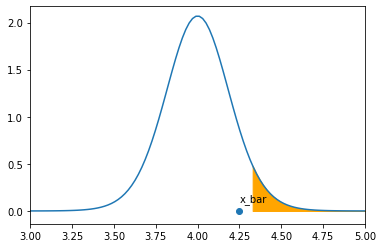

In [31]:
# Ploting the sampling distribution with rejection regions
import matplotlib.pyplot as plt
# Defining the x minimum and x maximum
x_min = 3.0
x_max = 5.0

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x, df=sample_size-1, loc=mean, scale=std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = t.pdf(x1, df=sample_size-1, loc=mean, scale=std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis


In [32]:
if(t1 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [33]:
p_value = 1.0 - t.sf(np.abs(1.118033988749895),df=sample_size-1)

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.8612549302121197
Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~. Given std of sample = 7 ms**

**step-1:** 
Alternative Hypothesis      $H_1$=$\mu$<100

Null Hypothesis             $H_0$=$\mu\geq100$

**step-2:** 

Collect a sample size of n=100

Compute sample mean

$\bar X$=97.5

**step-3:**

Compute Test statistic        

 $t= \frac{\bar x-\mu }{s/\sqrt{n}}$
 
 **step-4:**
 
 Decide $\alpha$
 
 **step-5:**
 
 **step-5.1** Decide left Tailed t test:  reject $H_0$ if t
 
 **step-5.2** Compute P value

In [42]:
alpha = 1-0.99

t_critical = t.ppf(1 - alpha,df=99)

print(t_critical)

2.3646058614359737


In [43]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 7
t_critical=2.36

In [44]:
t2 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t2)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

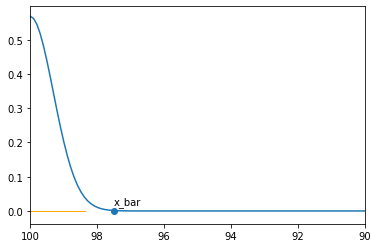

In [62]:
x_min = 100
x_max = 90

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = t.pdf(x, df=sample_size-1,loc=mean,scale=std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x2 = np.linspace(x_min, t_critical_left, 100)
y2 = t.pdf(x1,df=sample_size-1,loc=mean,scale=std)
plt.fill_between(x2, y2, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))


In [63]:
if(t2< t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [64]:
import scipy.stats

p_value = scipy.stats.t.sf(abs(-3.57), df=99)

print("p_value = ", p_value)

if(p_value <0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0002763355210518873
Reject Null Hypothesis
